Tariff: Loyal Octopus 12M Fixed December 2023 v1
Day unit rate: 27.43 p/kWh
Standing charge: 49.77 p

Tariff: Octopus Go
Day unit rate: 23.9 p/kWh
Night (00:30 - 05:30): 8.5 p/kWh
Standing charge: 49.12 p

Tariff: Octopus 12M Fixed August 2024 v4
Day unit rate: 25.0 p/kWh
Standing charge: 49.12 p

Tariff: Octopus 12M Fixed August 2024 v4 Eco 7
Day unit rate: 30.69 p/kWh
Night (00:30 - 07:30): 13.14 p/kWh
Standing charge: 48.94 p



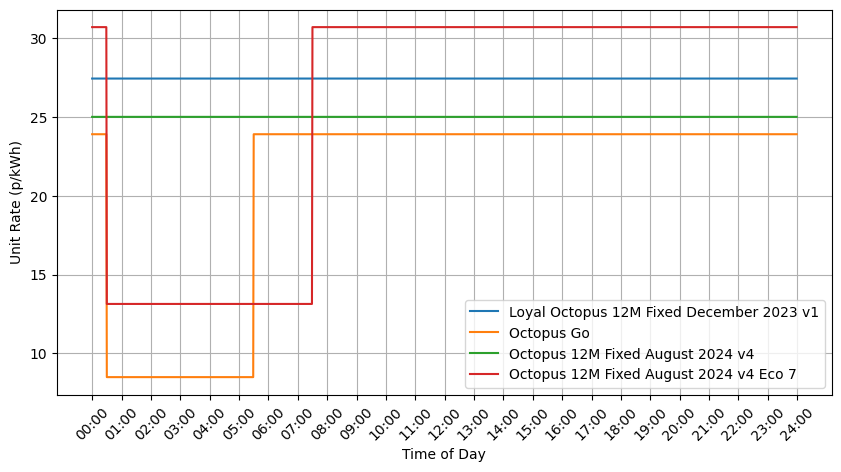

In [1]:
import matplotlib.pyplot as plt

from tariffs import Rate, Tariff

tariffs = [
  Tariff("Loyal Octopus 12M Fixed December 2023 v1", day_unit_rate=27.43, standing_charge=49.77),
  # Tariff("Aira Zero", day_unit_rate=22.88, standing_charge=49.12, additional_rates=[  # heat pump
  #   Rate("Peak", unit_rate=33.17, start_time="16:00", end_time="19:00"),
  #   Rate("Discounted", unit_rate=11.21, start_time="04:00", end_time="07:00"),
  #   Rate("Discounted", unit_rate=11.21, start_time="13:00", end_time="16:00"),
  # ]),
  # Tariff("Agile Octopus April 2024 v1", unit_rate=5.89, standing_charge=49.12),  # variable rates
  Tariff("Octopus Go", day_unit_rate=23.9, standing_charge=49.12, additional_rates=[
    Rate("Night", unit_rate=8.5, start_time="00:30", end_time="05:30"),
  ]),
  Tariff("Octopus 12M Fixed August 2024 v4", day_unit_rate=25.00, standing_charge=49.12),
  Tariff("Octopus 12M Fixed August 2024 v4 Eco 7", day_unit_rate=30.69, standing_charge=48.94, additional_rates=[
    Rate("Night", unit_rate=13.14, start_time="00:30", end_time="07:30"),  # NOTE: always UTC, not local time
  ]),
]

fig, ax = plt.subplots(figsize=(10, 5))

for tariff in tariffs:
  print(tariff)
  tariff.plot(ax)

plt.legend()
plt.show()


In [2]:
import pandas as pd

def load_consumption_data(filename: str) -> pd.Series:
  df = pd.read_csv(filename, header=0, names=["Consumption (kWh)", "Start", "End"], parse_dates=["Start", "End"])

  rows = []
  for _, row in df.iterrows():
    time_index = pd.date_range(start=row["Start"], end=row["End"], freq="min", inclusive="left")
    consumption_series = pd.Series(row["Consumption (kWh)"] / len(time_index), index=time_index)
    rows.append(consumption_series)

  return pd.concat(rows)

s = load_consumption_data("electricity-consumption.csv")
s

2024-06-01 00:00:00+01:00    0.011767
2024-06-01 00:01:00+01:00    0.011767
2024-06-01 00:02:00+01:00    0.011767
2024-06-01 00:03:00+01:00    0.011767
2024-06-01 00:04:00+01:00    0.011767
                               ...   
2024-08-31 00:55:00+01:00    0.014167
2024-08-31 00:56:00+01:00    0.014167
2024-08-31 00:57:00+01:00    0.014167
2024-08-31 00:58:00+01:00    0.014167
2024-08-31 00:59:00+01:00    0.014167
Freq: min, Length: 131100, dtype: float64

In [3]:
s.index

DatetimeIndex(['2024-06-01 00:00:00+01:00', '2024-06-01 00:01:00+01:00',
               '2024-06-01 00:02:00+01:00', '2024-06-01 00:03:00+01:00',
               '2024-06-01 00:04:00+01:00', '2024-06-01 00:05:00+01:00',
               '2024-06-01 00:06:00+01:00', '2024-06-01 00:07:00+01:00',
               '2024-06-01 00:08:00+01:00', '2024-06-01 00:09:00+01:00',
               ...
               '2024-08-31 00:50:00+01:00', '2024-08-31 00:51:00+01:00',
               '2024-08-31 00:52:00+01:00', '2024-08-31 00:53:00+01:00',
               '2024-08-31 00:54:00+01:00', '2024-08-31 00:55:00+01:00',
               '2024-08-31 00:56:00+01:00', '2024-08-31 00:57:00+01:00',
               '2024-08-31 00:58:00+01:00', '2024-08-31 00:59:00+01:00'],
              dtype='datetime64[ns, UTC+01:00]', length=131100, freq='min')

In [64]:
# Sum by hour
s_hourly = s.groupby(pd.Grouper(freq="h")).sum()
s_hourly

2024-06-01 00:00:00+01:00    0.711
2024-06-01 01:00:00+01:00    0.667
2024-06-01 02:00:00+01:00    0.604
2024-06-01 03:00:00+01:00    0.437
2024-06-01 04:00:00+01:00    0.458
                             ...  
2024-08-30 20:00:00+01:00    0.811
2024-08-30 21:00:00+01:00    0.837
2024-08-30 22:00:00+01:00    0.513
2024-08-30 23:00:00+01:00    0.480
2024-08-31 00:00:00+01:00    0.792
Freq: h, Length: 2185, dtype: float64

In [71]:
max_power, max_power_idx = s_hourly.max(), s_hourly.idxmax()
# Maximum power (%s) was used at (%s)
print(f"Maximum power {max_power} kWh was used at {max_power_idx.strftime('%c')}")
print(f"Minimum power {s_hourly.min()} kWh was used at {s_hourly.index.min().strftime('%c')}")

Maximum power 3.503 kWh was used at Sat Jun 22 21:00:00 2024
Minimum power 0.109 kWh was used at Sat Jun  1 00:00:00 2024


In [4]:
# Sum by hour
df = s.groupby(pd.Grouper(freq="h")).sum()
# Average for each hour
time_index_str = df.index.tz_convert("Europe/London").strftime("%H")
s2 = df.groupby(time_index_str).mean()
s2

00    0.476772
01    0.354440
02    0.283022
03    0.258769
04    0.231835
05    0.226330
06    0.223868
07    0.285143
08    0.221934
09    0.214319
10    0.293473
11    0.477637
12    0.581429
13    0.815319
14    0.865264
15    0.858912
16    0.715033
17    0.797538
18    0.593231
19    0.691857
20    0.724967
21    0.770011
22    0.639945
23    0.557418
dtype: float64

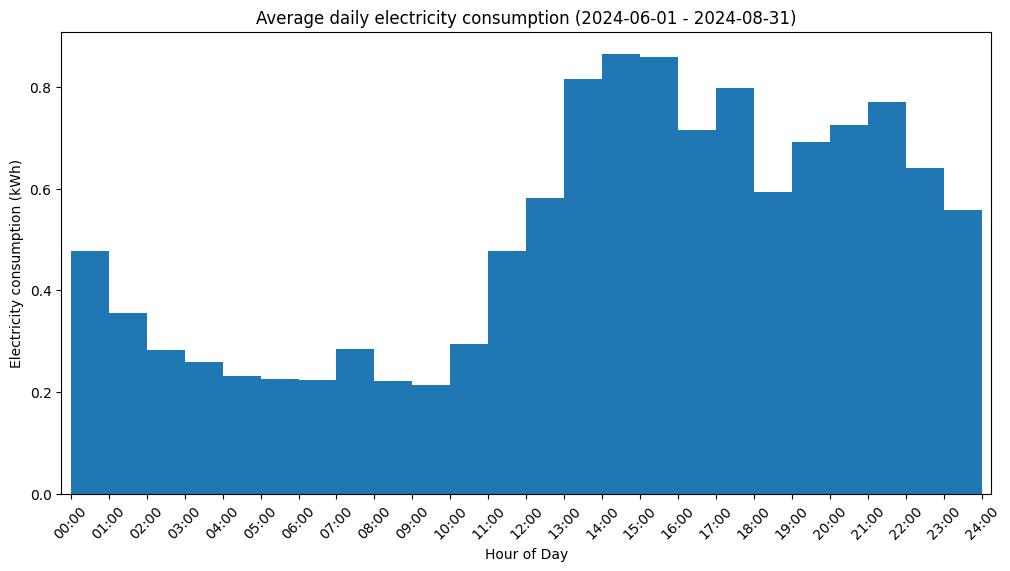

In [46]:
ax = s2.plot(kind="bar", align="edge", width=1, figsize=(12, 6))
ax.set_title(f"Average daily electricity consumption ({min(s.index).strftime('%Y-%m-%d')} - {max(s.index).strftime('%Y-%m-%d')})")

ax.set_ylabel("Electricity consumption (kWh)")
ax.set_xlabel("Hour of Day")

x_ticks = range(25)
ax.set_xticks(x_ticks)

x_tick_labels = [f"{h:02d}:00" for h in range(25)]
ax.set_xticklabels(x_tick_labels)

ax.tick_params(axis="x", rotation=45)

In [6]:
# Average for each minute
min_index_str = s.index.tz_convert("Europe/London").strftime("%H:%M")
s3 = s.groupby(min_index_str).mean()
s3

00:00    0.008266
00:01    0.008266
00:02    0.008266
00:03    0.008266
00:04    0.008266
           ...   
23:55    0.008950
23:56    0.008950
23:57    0.008950
23:58    0.008950
23:59    0.008950
Length: 1440, dtype: float64

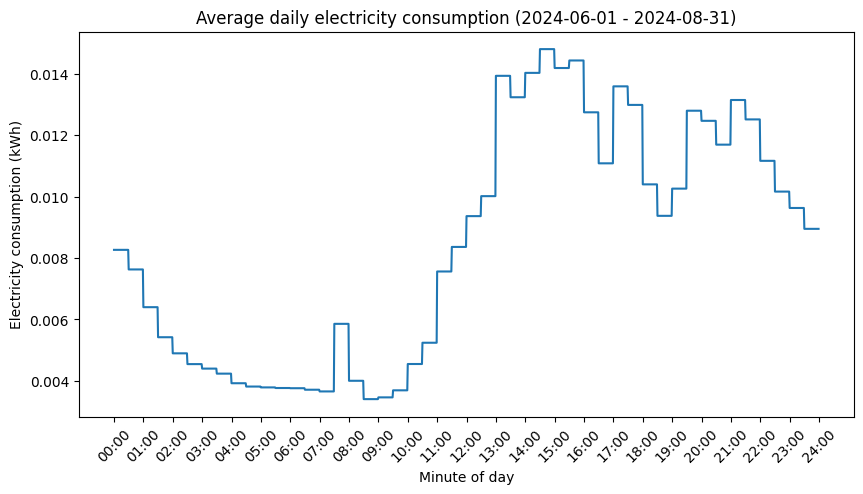

In [48]:
ax = s3.plot(kind="line", figsize=(10, 5))
ax.set_title(f"Average daily electricity consumption ({min(s.index).strftime('%Y-%m-%d')} - {max(s.index).strftime('%Y-%m-%d')})")

ax.set_ylabel("Electricity consumption (kWh)")
ax.set_xlabel("Minute of day")

x_ticks = range(0, 24*60+1, 60)
ax.set_xticks(x_ticks)

x_tick_labels = [f"{h:02d}:00" for h in range(25)]
ax.set_xticklabels(x_tick_labels)

ax.tick_params(axis="x", rotation=45)

In [75]:
# Average for each minute
weekday_hour_index_str = s_hourly.index.tz_convert("Europe/London").strftime("%w %H")
s_weekly = s_hourly.groupby(weekday_hour_index_str).median()
s_weekly

0 00    0.500
0 01    0.360
0 02    0.201
0 03    0.209
0 04    0.192
        ...  
6 19    1.070
6 20    0.932
6 21    0.857
6 22    0.804
6 23    0.771
Length: 168, dtype: float64

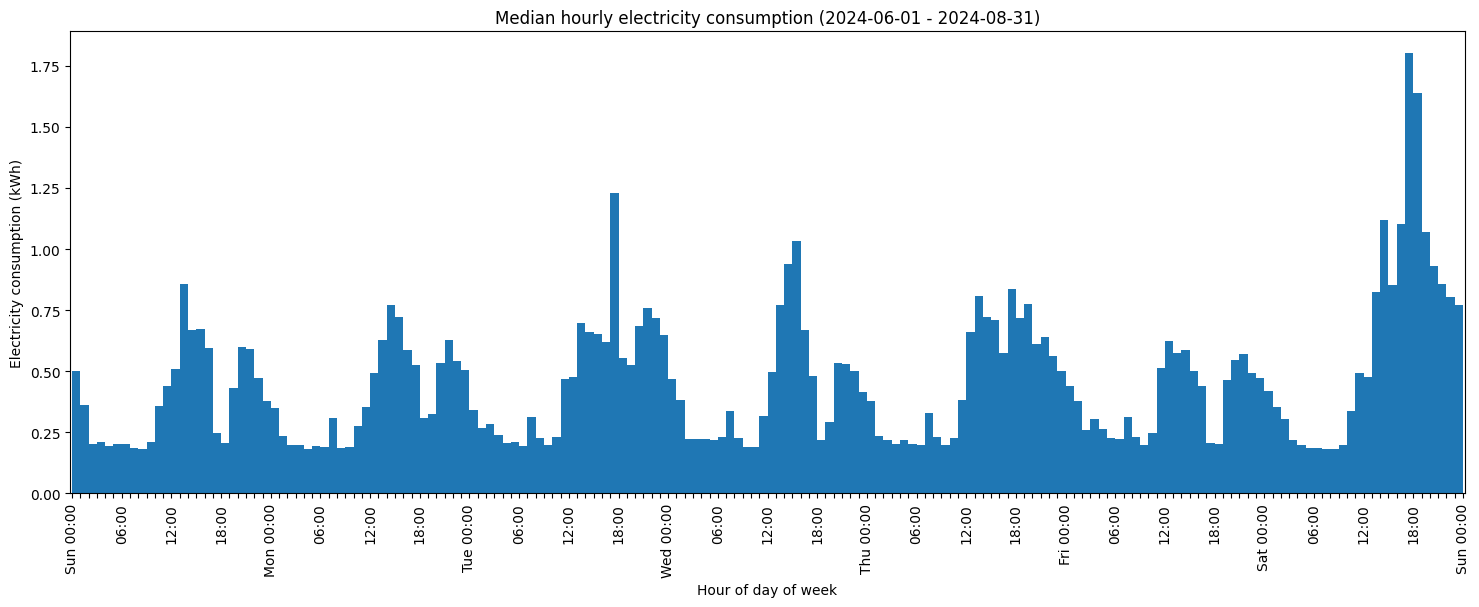

In [76]:
ax = s_weekly.plot(kind="bar", align="edge", width=1, figsize=(18, 6))

ax.set_title(f"Median hourly electricity consumption ({min(s.index).strftime('%Y-%m-%d')} - {max(s.index).strftime('%Y-%m-%d')})")
ax.set_ylabel("Electricity consumption (kWh)")
ax.set_xlabel("Hour of day of week")

x_ticks = range(0, 7*24+1, 1)
ax.set_xticks(x_ticks)

hours = [f"{h:02d}:00" for h in range(24)]
days = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

x_tick_labels = [(f"{d} {h}" if i == 0 else h) if i % 6 == 0 else "" for d in days for i, h in enumerate(hours)]
x_tick_labels += ["Sun 00:00"]
ax.set_xticklabels(x_tick_labels)

ax.tick_params(axis="x", rotation=90)